# Model Evaluation and Comparison

In this notebook, the trained machine learning models are evaluated and compared using standard performance metrics to identify the best model for predicting employee job change likelihood.


In [1]:
import pandas as pd
import joblib

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns


Load Dataset

In [2]:
df = pd.read_csv("../data/raw/aug_train.csv")

X = df.drop("target", axis=1)
y = df["target"]


Train–Test Split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


Load Saved Models

In [4]:
log_model = joblib.load("../models/logistic_regression.pkl")
rf_model = joblib.load("../models/random_forest.pkl")
xgb_model = joblib.load("../models/xgboost.pkl")
lgbm_model = joblib.load("../models/lightgbm.pkl")


Create ONE Evaluation Function

In [5]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    return accuracy, roc_auc


Evaluate All Models

In [6]:
results = {}

results["Logistic Regression"] = evaluate_model(log_model, X_test, y_test)
results["Random Forest"] = evaluate_model(rf_model, X_test, y_test)
results["XGBoost"] = evaluate_model(xgb_model, X_test, y_test)
results["LightGBM"] = evaluate_model(lgbm_model, X_test, y_test)

results_df = pd.DataFrame(
    results,
    index=["Accuracy", "ROC-AUC"]
).T

results_df


c:\Users\acer\Desktop\bia_project\venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\acer\Desktop\bia_project\venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,Accuracy,ROC-AUC
Logistic Regression,0.749217,0.791125
Random Forest,0.772182,0.795165
XGBoost,0.788100,0.803555
LightGBM,0.780793,0.801267


Confusion Matrix (ONLY for Best Model)

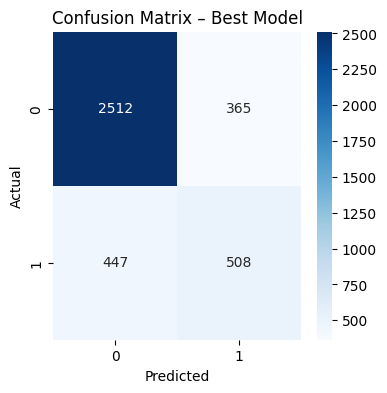

In [9]:
best_model = xgb_model

cm = confusion_matrix(y_test, best_model.predict(X_test))

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – Best Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Confusion Matrix Interpretation

The confusion matrix shows that the model correctly identifies a large number of employees who are not looking for a job change, while also successfully detecting a significant portion of employees who are likely to seek a job change. Although some misclassifications exist, the model demonstrates a good balance between identifying both classes, which is critical for employee retention prediction.


# Summary

## Final Model Selection and Conclusion

Based on the evaluation results, XGBoost achieved the highest accuracy and ROC-AUC score among all evaluated models. The confusion matrix further confirms its strong ability to correctly identify employees likely to seek a job change.

Therefore, XGBoost is selected as the final model for employee retention prediction, as it provides the best overall performance while effectively handling class imbalance.
